In [ ]:
import pandas as pd

# Rutas de los archivos de entrenamiento y prueba
training_file_path = 'data/customer_churn_dataset-training-master.csv'
testing_file_path = 'data/customer_churn_dataset-testing-master.csv'

# Cargar los datasets
training_data = pd.read_csv(training_file_path)
testing_data = pd.read_csv(testing_file_path)

# Mostrar las primeras filas de cada dataset para verificar la estructura
print("Primeras filas del dataset de entrenamiento:")
print(training_data.head())

print("\nPrimeras filas del dataset de prueba:")
print(testing_data.head())

# Mostrar las dimensiones de los datasets
print("\nDimensiones del dataset de entrenamiento:", training_data.shape)
print("Dimensiones del dataset de prueba:", testing_data.shape)


Primeras filas del dataset de entrenamiento:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3        

In [ ]:
# Paso 2a: Identificar valores duplicados
# Verificamos cuántos registros duplicados existen en cada dataset
duplicates_train = training_data.duplicated().sum()
duplicates_test = testing_data.duplicated().sum()

# Eliminamos los registros duplicados si existen
training_data = training_data.drop_duplicates()
testing_data = testing_data.drop_duplicates()

# Imprimir el número de duplicados eliminados
print(f"Duplicados eliminados en entrenamiento: {duplicates_train}")
print(f"Duplicados eliminados en prueba: {duplicates_test}")

# Paso 2b: Identificar valores faltantes
# Verificamos cuántos valores faltantes existen por columna en cada dataset
missing_train = training_data.isnull().sum()
missing_test = testing_data.isnull().sum()

# Mostramos los valores faltantes
print("\nValores faltantes por columna en entrenamiento:")
print(missing_train)

print("\nValores faltantes por columna en prueba:")
print(missing_test)



Duplicados eliminados en entrenamiento: 0
Duplicados eliminados en prueba: 0

Valores faltantes por columna en entrenamiento:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

Valores faltantes por columna en prueba:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
# Manejo de valores faltantes en el dataset de entrenamiento
# Usamos la mediana para valores numéricos y la moda para valores categóricos
for column in training_data.columns:
    if training_data[column].isnull().sum() > 0:
        if training_data[column].dtype in ['float64', 'int64']:
            # Si la columna es numérica, usamos la mediana
            training_data[column] = training_data[column].fillna(training_data[column].median())
        else:
            # Si la columna es categórica, usamos la moda
            training_data[column] = training_data[column].fillna(training_data[column].mode()[0])

# Verificamos que no queden valores faltantes en el dataset de entrenamiento
missing_train_after = training_data.isnull().sum()
print("\nValores faltantes finales en entrenamiento:")
print(missing_train_after)



Valores faltantes finales en entrenamiento:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
# Ajustar los tipos de datos en el dataset de entrenamiento
# Convertimos las columnas al tipo adecuado según su naturaleza
training_data = training_data.astype({
    'CustomerID': 'int',
    'Age': 'int',
    'Tenure': 'int',
    'Usage Frequency': 'int',
    'Support Calls': 'int',
    'Payment Delay': 'int',
    'Total Spend': 'float',
    'Last Interaction': 'int',
    'Churn': 'int'
})

# Ajustar los tipos de datos en el dataset de prueba
testing_data = testing_data.astype({
    'CustomerID': 'int',
    'Age': 'int',
    'Tenure': 'int',
    'Usage Frequency': 'int',
    'Support Calls': 'int',
    'Payment Delay': 'int',
    'Total Spend': 'float',
    'Last Interaction': 'int',
    'Churn': 'int'
})

# Verificamos los tipos de datos ajustados
print("\nTipos de datos en entrenamiento:")
print(training_data.dtypes)

print("\nTipos de datos en prueba:")
print(testing_data.dtypes)



Tipos de datos en entrenamiento:
CustomerID             int64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay          int64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction       int64
Churn                  int64
dtype: object

Tipos de datos en prueba:
CustomerID             int64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay          int64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction       int64
Churn                  int64
dtype: object


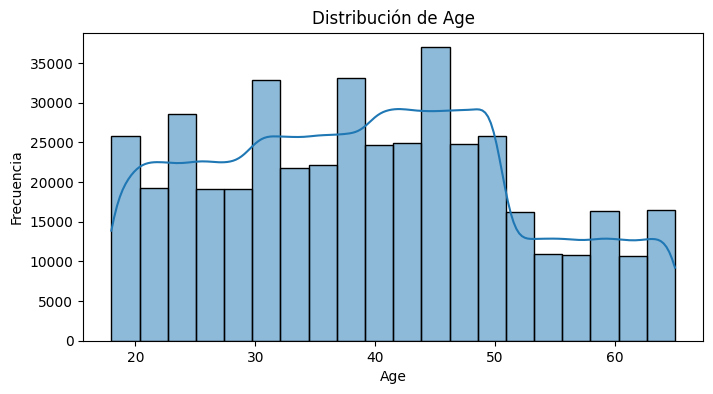

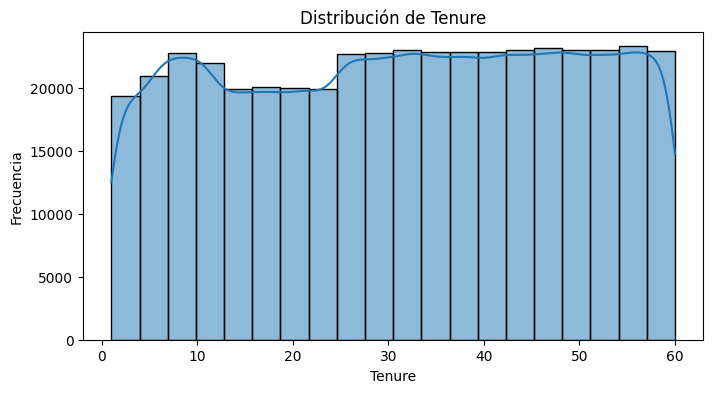

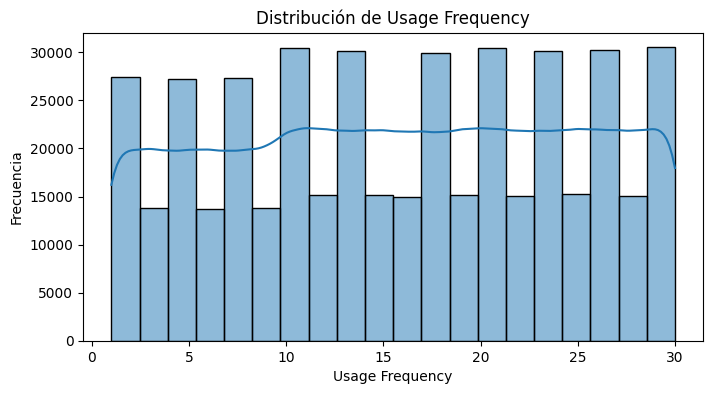

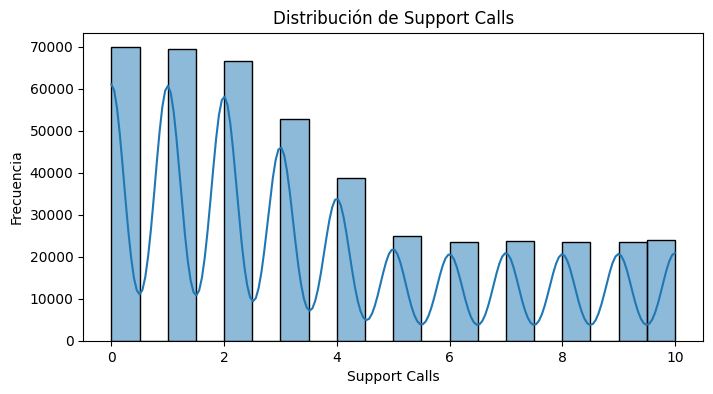

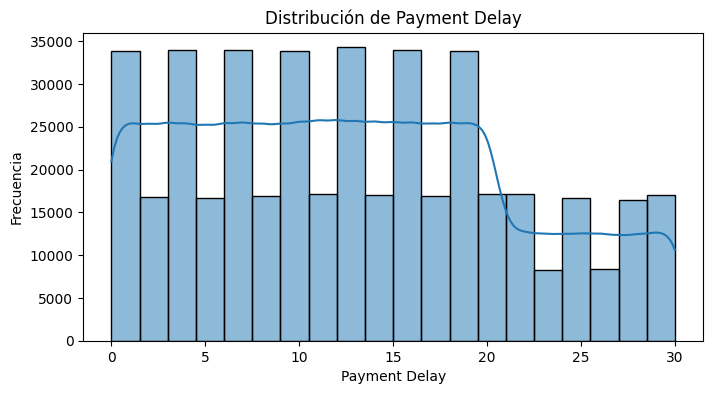

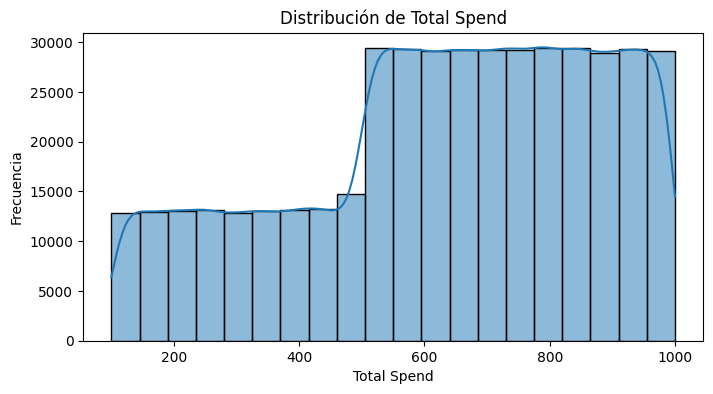

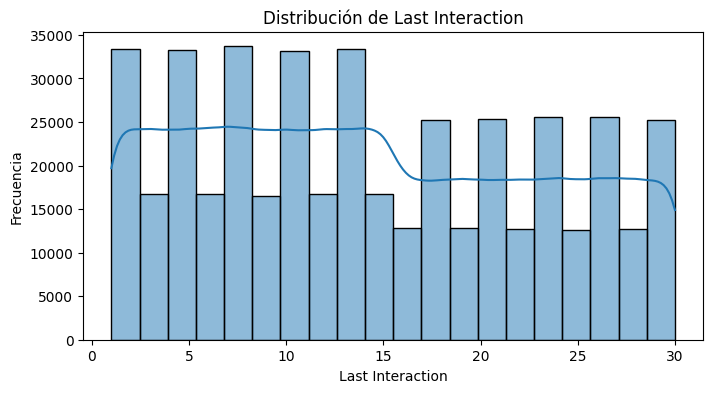

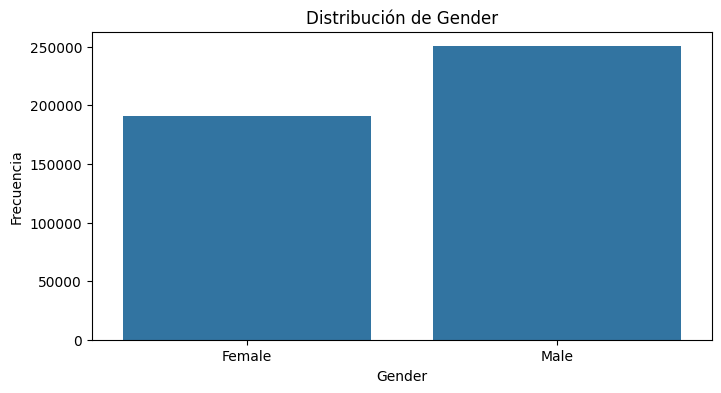

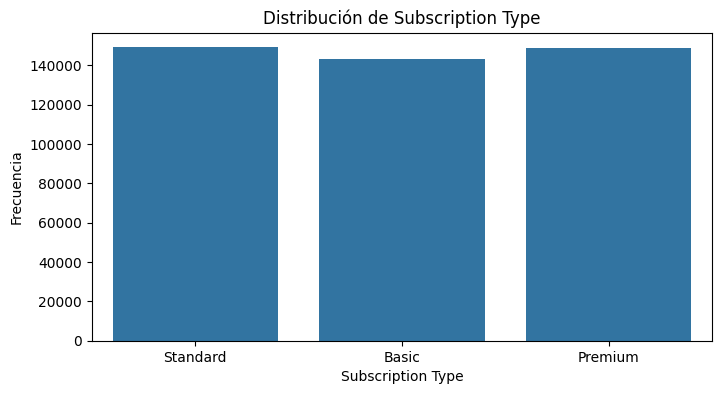

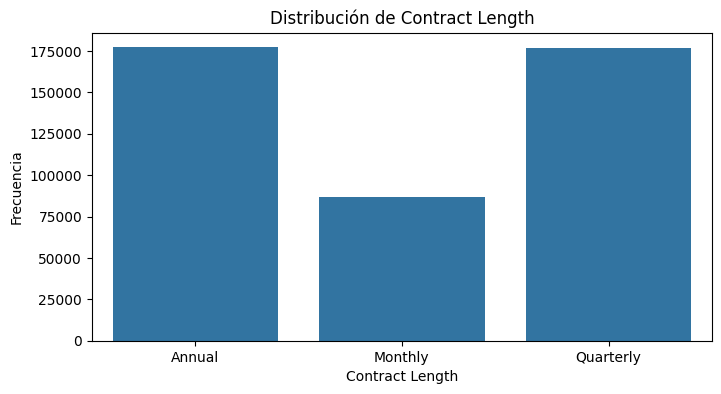

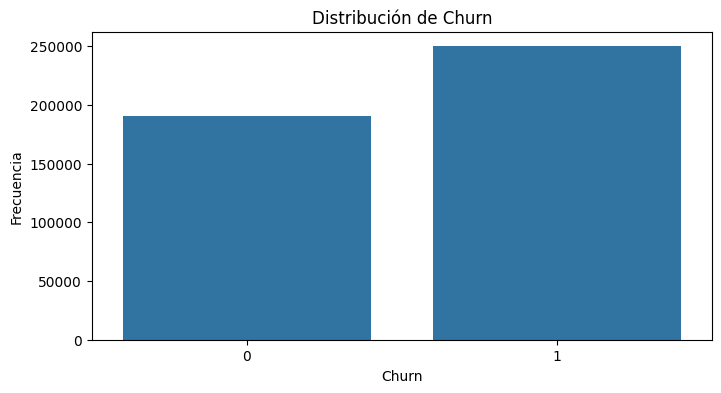

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                     'Payment Delay', 'Total Spend', 'Last Interaction']

# Crear histogramas para variables numéricas
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(training_data[column], kde=True, bins=20)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

# Variables categóricas
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length', 'Churn']

# Gráficos de barras para variables categóricas
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=training_data, x=column)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

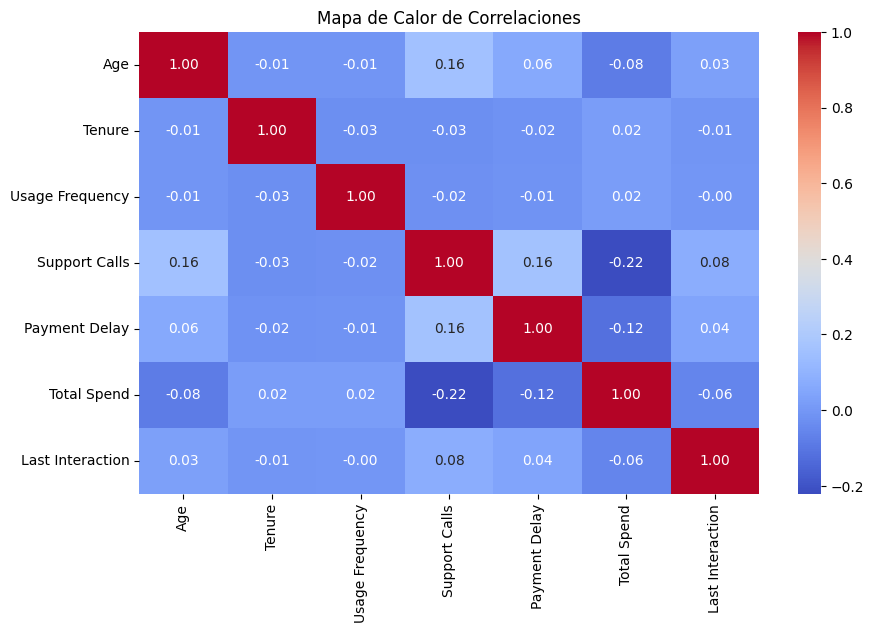

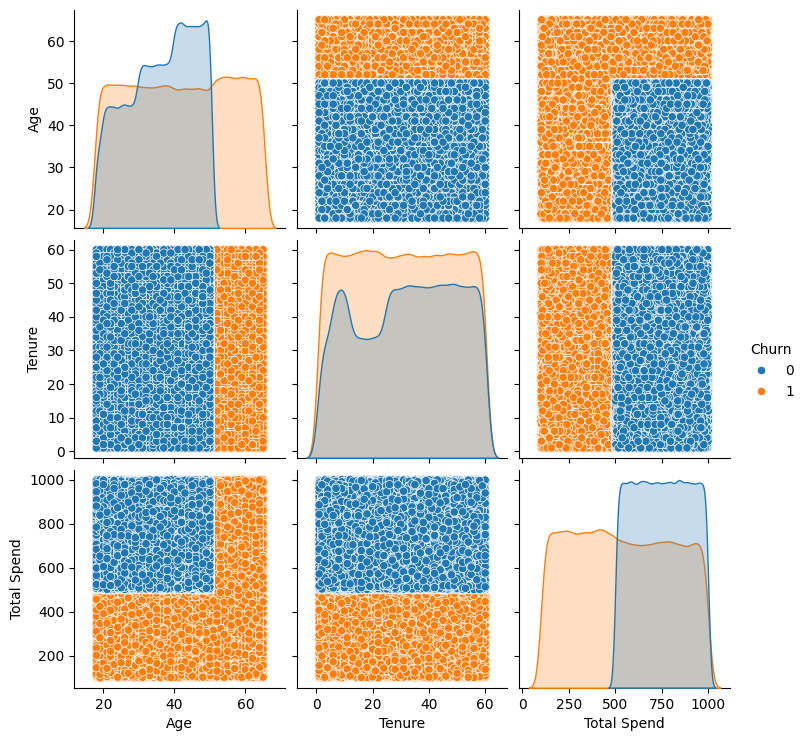

In [6]:
# Mapa de calor para correlaciones entre variables numéricas
plt.figure(figsize=(10, 6))
correlation_matrix = training_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# Diagramas de dispersión para variables clave
sns.pairplot(training_data, vars=['Age', 'Tenure', 'Total Spend'], hue='Churn', diag_kind='kde')
plt.show()

In [ ]:
# Estadísticas descriptivas para variables numéricas
statistics = training_data[numerical_columns].describe()

# Distribución porcentual de variables categóricas
categorical_distribution = {
    column: training_data[column].value_counts(normalize=True) * 100
    for column in categorical_columns
}

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas para variables numéricas:")
print(statistics)

print("\nDistribución porcentual de variables categóricas:")
for column, distribution in categorical_distribution.items():
    print(f"\n{column}:\n{distribution}")


Estadísticas descriptivas para variables numéricas:
                 Age         Tenure  Usage Frequency  Support Calls  \
count  440833.000000  440833.000000    440833.000000  440833.000000   
mean       39.373153      31.256337        15.807494       3.604435   
std        12.442355      17.255708         8.586232       3.070215   
min        18.000000       1.000000         1.000000       0.000000   
25%        29.000000      16.000000         9.000000       1.000000   
50%        39.000000      32.000000        16.000000       3.000000   
75%        48.000000      46.000000        23.000000       6.000000   
max        65.000000      60.000000        30.000000      10.000000   

       Payment Delay    Total Spend  Last Interaction  
count  440833.000000  440833.000000     440833.000000  
mean       12.965719     631.616289         14.480867  
std         8.258053     240.802732          8.596198  
min         0.000000     100.000000          1.000000  
25%         6.000000     480

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Preprocesamiento de datos
# Codificamos las variables categóricas utilizando One-Hot Encoding
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
X = training_data.drop(columns=['Churn', 'CustomerID'])
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Definimos la etiqueta (variable objetivo)
y = training_data['Churn']

# División del dataset
# Dividimos los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reducir el tamaño del dataset para pruebas rápidas
# Usamos una muestra del 10% de los datos para reducir el tiempo de entrenamiento
X_train_sample = X_train.sample(frac=0.05, random_state=42)  # 10% del dataset
y_train_sample = y_train.loc[X_train_sample.index]  # Etiquetas correspondientes

# Entrenamiento del Modelo SVM
# Usamos el kernel lineal para reducir la complejidad computacional
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Entrenamos el modelo
print("Entrenando el modelo SVM...")
svm_model.fit(X_train_sample, y_train_sample)

# Predicción y Evaluación
# Hacemos predicciones en el conjunto de validación
svm_preds = svm_model.predict(X_val)

# Generamos métricas de evaluación
print("\nReporte de clasificación para SVM:")
print(classification_report(y_val, svm_preds))
print("\nROC-AUC para SVM:", roc_auc_score(y_val, svm_model.predict_proba(X_val)[:, 1]))

Entrenando el modelo SVM...

Reporte de clasificación para SVM:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     38143
           1       0.93      0.88      0.91     50024

    accuracy                           0.90     88167
   macro avg       0.89      0.90      0.90     88167
weighted avg       0.90      0.90      0.90     88167


ROC-AUC para SVM: 0.9598144001174904


In [9]:
from xgboost import XGBClassifier

# Preprocesamiento
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
X = training_data.drop(columns=['Churn', 'CustomerID'])
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Etiqueta (variable objetivo)
y = training_data['Churn']

# División del dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del Modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
print("Entrenando el modelo XGBoost...")
xgb_model.fit(X_train, y_train)

# Predicciones y Evaluación
xgb_preds = xgb_model.predict(X_val)
xgb_classification_report = classification_report(y_val, xgb_preds)
xgb_roc_auc = roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])

# Resultados
print("\nReporte de clasificación para XGBoost:")
print(xgb_classification_report)
print("\nROC-AUC para XGBoost:", xgb_roc_auc)

Entrenando el modelo XGBoost...

Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38143
           1       1.00      1.00      1.00     50024

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167


ROC-AUC para XGBoost: 0.9999994565175897


In [10]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Subconjunto fijo del dataset
X_train_sample = X_train.sample(frac=0.05, random_state=42)  # Usar 1% de los datos
#fue necesario reducir el conjunto de datos debido a la limitante en la capacidad de la pc
y_train_sample = y_train.loc[X_train_sample.index]

# Parámetros ajustados
svm_params = {
    'C': [1, 10],  # Rango reducido
    'kernel': ['linear']  # Kernel más rápido
}

# Configuración de HalvingRandomSearchCV
svm_search = HalvingRandomSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=svm_params,
    factor=2,  # Reducir iterativamente el espacio de búsqueda
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Ejecutar búsqueda
print("Optimizando el modelo SVM con HalvingRandomSearchCV...")
svm_search.fit(X_train_sample, y_train_sample)

# Mejor modelo y evaluación
best_svm_model = svm_search.best_estimator_
print("\nMejores hiperparámetros para SVM:", svm_search.best_params_)

# Evaluación
svm_preds = best_svm_model.predict(X_val)
svm_classification_report = classification_report(y_val, svm_preds)
svm_roc_auc = roc_auc_score(y_val, best_svm_model.predict_proba(X_val)[:, 1])

# Resultados
print("\nReporte de clasificación para el mejor modelo SVM:")
print(svm_classification_report)
print("\nROC-AUC para el mejor modelo SVM:", svm_roc_auc)

Optimizando el modelo SVM con HalvingRandomSearchCV...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 10
min_resources_: 20
max_resources_: 17633
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 2
n_resources: 20
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/morkand/Desktop/MachineLearning/ExamenMachineLearning3/.venv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=881. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 1
n_resources: 40
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Mejores hiperparámetros para SVM: {'kernel': 'linear', 'C': 10}

Reporte de clasificación para el mejor modelo SVM:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     38143
           1       0.93      0.89      0.91     50024

    accuracy                           0.90     88167
   macro avg       0.89      0.90      0.89     88167
weighted avg       0.90      0.90      0.90     88167


ROC-AUC para el mejor modelo SVM: 0.9598225180256816


In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import warnings

# Ignorar advertencias de XGBoost
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

# Definir los parámetros para optimización
xgb_params = {
    'n_estimators': [50, 100, 200],   # Número de árboles
    'max_depth': [3, 5, 7],          # Profundidad máxima
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.8, 1.0],         # Fracción de muestras usadas
    'colsample_bytree': [0.8, 1.0]   # Fracción de columnas usadas por árbol
}

# Configuración de RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),  # Eliminamos "use_label_encoder"
    param_distributions=xgb_params,
    n_iter=10,  # Número de combinaciones a probar
    cv=3,       # Validación cruzada
    random_state=42,
    verbose=1,
    n_jobs=-1   # Paralelización
)

# Usar un subconjunto para optimización rápida
X_train_sample = X_train.sample(frac=0.1, random_state=42)  # Usar 10% de los datos
y_train_sample = y_train.loc[X_train_sample.index]

# Ejecutar la optimización
print("Optimizando el modelo XGBoost...")
xgb_search.fit(X_train_sample, y_train_sample)

# Obtener el mejor modelo y evaluación
best_xgb_model = xgb_search.best_estimator_
print("\nMejores hiperparámetros para XGBoost:", xgb_search.best_params_)

# Evaluar el mejor modelo
xgb_preds = best_xgb_model.predict(X_val)
xgb_classification_report = classification_report(y_val, xgb_preds)
xgb_roc_auc = roc_auc_score(y_val, best_xgb_model.predict_proba(X_val)[:, 1])

# Mostrar resultados
print("\nReporte de clasificación para el mejor modelo XGBoost:")
print(xgb_classification_report)
print("\nROC-AUC para el mejor modelo XGBoost:", xgb_roc_auc)

Optimizando el modelo XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Mejores hiperparámetros para XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

Reporte de clasificación para el mejor modelo XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38143
           1       1.00      1.00      1.00     50024

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167


ROC-AUC para el mejor modelo XGBoost: 0.9999994434153137


In [12]:
# Verificar si las claves son strings o números
svm_report_dict = classification_report(y_val, svm_preds, output_dict=True)
xgb_report_dict = classification_report(y_val, xgb_preds, output_dict=True)

# Detectar la clave correcta para la clase positiva
positive_class_key = '1' if '1' in svm_report_dict else 1

# Métricas de SVM
svm_metrics = {
    'Modelo': 'SVM',
    'Accuracy': best_svm_model.score(X_val, y_val),
    'Precision': svm_report_dict[positive_class_key]['precision'],
    'Recall': svm_report_dict[positive_class_key]['recall'],
    'F1-Score': svm_report_dict[positive_class_key]['f1-score'],
    'ROC-AUC': svm_roc_auc
}

# Métricas de XGBoost
xgb_metrics = {
    'Modelo': 'XGBoost',
    'Accuracy': best_xgb_model.score(X_val, y_val),
    'Precision': xgb_report_dict[positive_class_key]['precision'],
    'Recall': xgb_report_dict[positive_class_key]['recall'],
    'F1-Score': xgb_report_dict[positive_class_key]['f1-score'],
    'ROC-AUC': xgb_roc_auc
}

# Combinar métricas en un DataFrame
comparison_df = pd.DataFrame([svm_metrics, xgb_metrics])

# Mostrar la tabla de comparación
print("\nComparación de rendimiento entre SVM y XGBoost:")
print(comparison_df)


Comparación de rendimiento entre SVM y XGBoost:
    Modelo  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      SVM  0.896084   0.927767  0.885815  0.906306  0.959823
1  XGBoost  0.999580   0.999760  0.999500  0.999630  0.999999


In [13]:
# Selección del modelo basado en ROC-AUC
best_model = 'SVM' if svm_roc_auc > xgb_roc_auc else 'XGBoost'

print(f"El mejor modelo es: {best_model}")

El mejor modelo es: XGBoost


### Observaciones Finales

1. **Modelo Seleccionado**:
   - Comparando las métricas ROC-AUC, seleccionamos el modelo con el mejor rendimiento.
   - El modelo con mayor valor de ROC-AUC se considera más efectivo para la predicción de churn.

2. **Interpretación de Resultados**:
   - El valor de ROC-AUC indica la capacidad del modelo para distinguir entre clases (churn y no churn).
   - Una puntuación cercana a 1 es ideal, mientras que valores cercanos a 0.5 indican rendimiento aleatorio.

3. **Siguientes Pasos**:
   - Evaluar el modelo seleccionado en un dataset no visto (de prueba).
   - Optimizar aún más los hiperparámetros si es necesario.
   - Implementar el modelo en un sistema de producción para monitorear su rendimiento en tiempo real.
